# Unsupervised Learning

Data Science - CA#06: *dimensionality reduction techniques and unsupervised learning* - Spring 1403 \
In this assignment, we will delve into dimensionality reduction and unsupervised learning tasks.

## Task

### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [9]:
PALETTE = ["#2E7B7C", "#3B9EA0", "#79CBCD", "#FFCAD4", "#FFBCDA", "#F39EC7", "#F765A3"]

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Preprocessing

#### Load dataset

In [11]:
data = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [13]:
data.shape

(101766, 50)

In [14]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [15]:
data = data.replace("?",np.nan)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [17]:
missing_percentage = data.isnull().sum() * 100 / len(data)

print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

#### Highest missing values are in weight, payer_code and medical_specialty
  - weight ~97%
  - payer_code ~40%
  - medical_specialty 50%
  - max_glu_serum 95%
  - A1Cresult 83%

but Na values in last 2 features are meaningful, so we keep them
#### Dropping these columns


In [18]:
data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)

check for any duplicate record: zero

In [19]:
len(data)-len(data.drop_duplicates())

0

In [20]:
'Number of patients in dataset is {:,}'.format(data['patient_nbr'].nunique())


'Number of patients in dataset is 71,518'

In [21]:
'Number of records in dataset is {:,}'.format(len(data))

'Number of records in dataset is 101,766'

#### Analysing the unique values in Categorical values

In [22]:
cat_var = ["race", "gender", "age","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","tolazamide","examide","citoglipton","insulin","glyburide-metformin","glipizide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","change","diabetesMed","readmitted"]
data_ = data[cat_var].select_dtypes(exclude=['int', 'float'])
for col in data_.columns:
    print(data_[col].unique())
    print(data_[col].value_counts())

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
['Female' 'Male' 'Unknown/Invalid']
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
['No' 'Steady' 'Up' 'Down']
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64
['No' 'Up' 'Steady' 'Down']
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
['No' 'Steady' 'Down' 'Up']
nateglinide
No        101063
Stead

- Gender have 3 'Unknown/Invalid' values  
- 'citoglipton', 'examide' have same values throughout the data. Hence can be removed from the data
- Crucial column - readmitted have values in terms of NO, >30 and <30

In [23]:
## Leaving out Gender values if 'Unknown/Invalid'
## Dropping column 'citoglipton', 'examide'
data = data.drop(data.loc[data["gender"]=="Unknown/Invalid"].index, axis=0)
data = data.drop(['citoglipton', 'examide'], axis = 1)

Variable Encoding

In [24]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)
# keys is the same as before
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)
data.head(5)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,0,[0-10),6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,NO
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,...,0,1,0,0,0,0,0,1,1,>30
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,...,0,0,0,0,0,0,0,0,1,NO
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,...,0,1,0,0,0,0,0,1,1,NO
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,...,0,1,0,0,0,0,0,1,1,NO


Glucose serum and A1C test results were also categorized as Normal, Abnormal, and Not tested.

In [25]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 2)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)
data['A1Cresult'] = data['A1Cresult'].fillna(-99)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 2)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)
data['max_glu_serum'] = data['max_glu_serum'].fillna(-99)


In [26]:
data['max_glu_serum'].unique()

array([-99.,   2.,   0.,   1.])

In [27]:
data['A1Cresult'].unique()

array([-99.,   1.,   2.,   0.])

In [28]:
for col in data.select_dtypes(include=[bool]):
    data[col] = data[col].astype(np.int64)

In [29]:
for col1 in ['gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1','diag_2','diag_3']:
    data[col1] = pd.to_numeric(data[col1], errors='coerce')

handling NaNs in diag_1, 2, 3. as ita appears that mean and median are so different, we use median value to replace missing ones.

In [30]:
selected_columns = data[['diag_1', 'diag_2', 'diag_3']]  # Select by column names
selected_columns.describe()

,diag_1,diag_2,diag_3
count,100097.000000,98869.000000,95283.000000
mean,493.577164,438.667065,418.175375
std,206.712806,178.895204,177.321334
min,3.000000,5.000000,3.000000
25%,410.000000,276.000000,272.000000
50%,440.000000,425.000000,403.000000
75%,599.000000,530.000000,496.000000
max,999.000000,999.000000,999.000000


In [31]:
data['diag_1'] = data['diag_1'].fillna(data['diag_1'].median())
data['diag_2'] = data['diag_2'].fillna(data['diag_2'].median())
data['diag_3'] = data['diag_3'].fillna(data['diag_3'].median())

In [32]:
data.isnull().sum() * 100 / len(data)

encounter_id                0.000000
patient_nbr                 0.000000
race                        2.231656
gender                      0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000000
diag_2                      0.000000
diag_3                      0.000000
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

Age-Assumption: The average age of the patient falls in the middle of the age category.
The resulting variable is a numeric rating based on midpoints in age categories

so code age intervals [0-10) - [90-100) from 1-10

In [33]:
data.age = data.age.replace({"[70-80)":75, "[60-70)":65, "[50-60)":55, "[80-90)":85, "[40-50)":45, "[30-40)":35, "[90-100)":95, "[20-30)":25, "[10-20)":15, "[0-10)":5})
print(data.age.value_counts())

age
75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64


one-hot-encoding on categorical features. convert nominal values to dummy values

In [34]:
df_race = pd.get_dummies(data['race'])
df_insulin = pd.get_dummies(data['insulin'])

data = pd.concat([data, df_race, df_insulin], axis=1)
data.drop(['race', 'insulin'], axis=1, inplace=True)

In [35]:
data.shape

(101763, 50)

Map values according to the specified conditions.
- '0' means no readmission
- '1' means readmission after being >30 days discharged
- '2' means readmission after being <30 days discharged

In [36]:
data['readmitted'] = data['readmitted'].map({'NO': 0, '<30': 1, '>30': 2})

In [37]:
data.shape
data.head(5)

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other,0,1
0,2278392,8222157,0,5,6,25,1,1,41,0,...,0,0,0,False,False,True,False,False,True,False
1,149190,55629189,0,15,1,1,7,3,59,0,...,1,1,2,False,False,True,False,False,False,True
2,64410,86047875,0,25,1,1,7,2,11,5,...,0,1,0,True,False,False,False,False,True,False
3,500364,82442376,1,35,1,1,7,2,44,1,...,1,1,0,False,False,True,False,False,False,True
4,16680,42519267,1,45,1,1,7,1,51,0,...,1,1,0,False,False,True,False,False,False,True


In [38]:
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

List of columns to be scaled, Instantiation the MinMaxScaler, Transform the data, Create a DataFrame from the scaled data

In [39]:
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

scaler = MinMaxScaler().fit(data[feature_scale_cols])

data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)

data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

print(data.head())

   encounter_id  patient_nbr  gender  age  admission_type_id  \
0       2278392      8222157       0    5                  6   
1        149190     55629189       0   15                  1   
2         64410     86047875       0   25                  1   
3        500364     82442376       1   35                  1   
4         16680     42519267       1   45                  1   

   discharge_disposition_id  admission_source_id  diag_1  diag_2  diag_3  ...  \
0                        25                    1  250.83  425.00   403.0  ...   
1                         1                    7  276.00  250.01   255.0  ...   
2                         1                    7  648.00  250.00   403.0  ...   
3                         1                    7    8.00  250.43   403.0  ...   
4                         1                    7  197.00  157.00   250.0  ...   

       0      1  time_in_hospital  num_lab_procedures  num_procedures  \
0   True  False          0.000000            0.305344  

In [40]:
data.columns = data.columns.astype(str)

In [41]:
data.to_csv('preprocessed_data.csv', index=False)

In [42]:
prepared_data = data.drop(['encounter_id', 'patient_nbr'], axis=1)
prepared_data

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,0,1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_inpatient,number_emergency,number_outpatient
0,0,5,6,25,1,250.83,425.00,403.0,-99.0,-99.0,...,True,False,0.000000,0.305344,0.000000,0.0000,0.000000,0.000000,0.0,0.000000
1,0,15,1,1,7,276.00,250.01,255.0,-99.0,-99.0,...,False,True,0.153846,0.442748,0.000000,0.2125,0.533333,0.000000,0.0,0.000000
2,0,25,1,1,7,648.00,250.00,403.0,-99.0,-99.0,...,True,False,0.076923,0.076336,0.833333,0.1500,0.333333,0.131724,0.0,0.150382
3,1,35,1,1,7,8.00,250.43,403.0,-99.0,-99.0,...,False,True,0.076923,0.328244,0.166667,0.1875,0.400000,0.000000,0.0,0.000000
4,1,45,1,1,7,197.00,157.00,250.0,-99.0,-99.0,...,False,True,0.000000,0.381679,0.000000,0.0875,0.266667,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,75,1,3,7,250.13,291.00,458.0,-99.0,2.0,...,False,True,0.153846,0.381679,0.000000,0.1875,0.533333,0.000000,0.0,0.000000
101762,0,85,1,4,5,560.00,276.00,787.0,-99.0,-99.0,...,False,True,0.307692,0.244275,0.500000,0.2125,0.533333,0.131724,0.0,0.000000
101763,1,75,1,1,7,38.00,590.00,296.0,-99.0,-99.0,...,False,True,0.000000,0.396947,0.000000,0.1000,0.800000,0.000000,0.0,0.089062
101764,0,85,2,3,7,996.00,285.00,998.0,-99.0,-99.0,...,False,True,0.692308,0.335878,0.333333,0.2500,0.533333,0.131724,0.0,0.000000


### Dimensionality Reduction

Perform PCA. Adjust number of components so that 0.95 of charactristics would be saved

In [64]:
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(prepared_data)
pca.n_components_

3

Create a DataFrame with principal components

In [44]:
pca_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df.to_csv('pca_data.csv', index=False)

### Unsupervised Learning

#### *K-Means*

In [45]:
sil_scores = []
K = range(3, 12)

In [46]:
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(pca_df, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

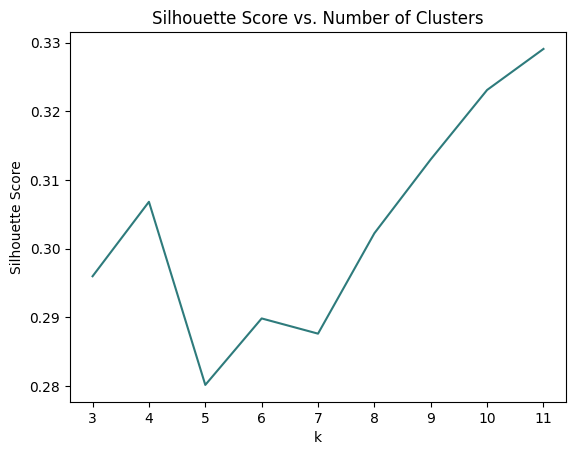

Optimal number of clusters: 11


In [47]:
plt.plot(K, sil_scores, PALETTE[0])
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

optimal_k = K[sil_scores.index(max(sil_scores))]
print(f'Optimal number of clusters: {optimal_k}')

In [48]:
optimal_k = 11

In [49]:
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(pca_df)
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=[f'PC{i+1}' for i in range(cluster_centers.shape[1])])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
pca_df['Cluster'] = kmeans.labels_

now we can see the clusters in a 3d scatter plot:

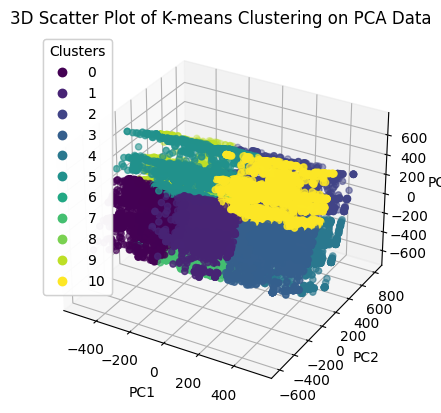

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of K-means Clustering on PCA Data')
plt.show()

Here is the interactive plot of the same results:

In [52]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', title='3D Scatter Plot of K-means Clustering on PCA Data')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#### *DBScan*

In [53]:
pca_df = pca_df.drop(columns=['Cluster'])

In [54]:
eps_values = np.arange(0.1, 2.1, 0.7)
min_samples_values = range(4, 8)

In [55]:
results = []

best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(pca_df)
        if len(set(labels)) > 1:
            score = silhouette_score(pca_df, labels)
            results.append({'eps': eps, 'min_samples': min_samples, 'score': score})
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}


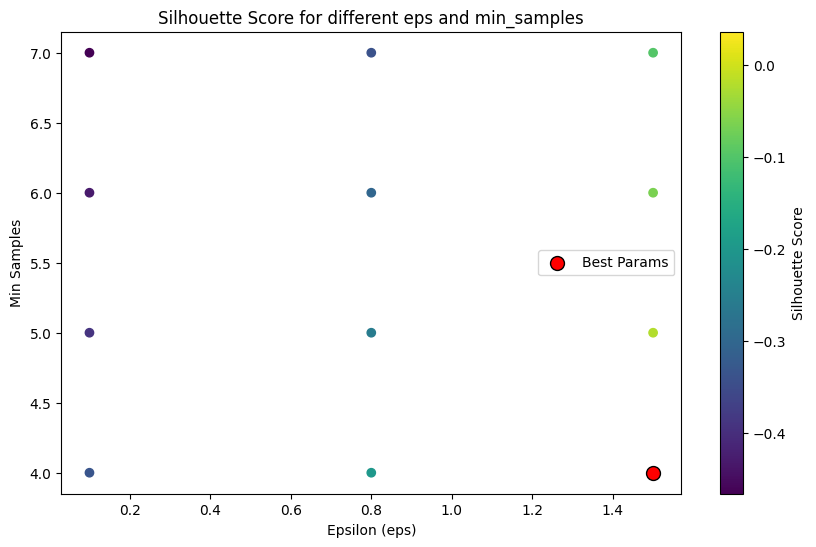

Best silhouette score: 0.0359505384168777
Best parameters: {'eps': 1.5, 'min_samples': 4}


In [56]:
results_df = pd.DataFrame(results)
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(results_df['eps'], results_df['min_samples'], c=results_df['score'], cmap='viridis')
ax.set_xlabel('Epsilon (eps)')
ax.set_ylabel('Min Samples')
ax.set_title('Silhouette Score for different eps and min_samples')
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Silhouette Score')

# Highlight the best parameters on the plot
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']
ax.scatter([best_eps], [best_min_samples], c='red', s=100, edgecolors='k', label='Best Params')
ax.legend()

plt.show()

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: {best_params}")

In [57]:
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan.fit_predict(pca_df)

In [58]:
result_df = pd.DataFrame({
    'id_encounter': data.index,
    'kmean_label': kmeans_labels,
    'dbscan_label': dbscan_labels
})

result_df.to_csv('clustering_results.csv', index=False)


## Questions

### 1. What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.

َfter showing some general information about the data set, we calculated the percentage of null values. Then we dropped the first three features with the most amount of null values. But we kept the 2 features in which null value was meaningful. Then we analyzed the unique values in the categorical features. Based on this analysis we handled each categorical values accordingly. For features with values like yes/no or female/male we replace them with 0 and 1.

For features with values of no/steady/up/down we assigned 0 to no and 1 to steady, up and down. For other features with NaNs, we replaced the missing value with the median of these features. For feature age we replaced each interval with its mean value. For features race and insulin we used one-hot encoding.

For scaling we used minMaxScalar to scale some columns that were not previously scaled. Finally we changed all the column types to int and float.

### 2. What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?

We performed dimensionality reduction using Principal Component Analysis (PCA) with the parameter n_components set to 0.95. This means we want to retain 95% of the variance in the original dataset.

The PCA algorithm identified the most significant components (combinations of original features) that contribute to the variance in the data. The number of components retained is 3, which gives the number of principal components selected. The variables retained in the reduced dataset are the principal components themselves, not the original variables. Each principal component is a linear combination of the original variables, with coefficients determined during the PCA process.

 Dimensionality reduction with PCA aims to preserve as much variance in the original dataset as possible while reducing the number of features. Retaining 95% of the variance strikes a balance between simplifying the dataset and retaining valuable information. This decision helps in reducing computational complexity, alleviating the curse of dimensionality, and often aids in improving the performance of machine learning models by reducing noise and focusing on the most important features.

### 3. Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.

Shown in the notebook

### 4. How can we determine the optimal number of clusters in K-Means?

Determining the optimal number of clusters in K-Means is essential to ensure that the clustering algorithm divides the data into meaningful and interpretable groups. Several methods can help determine the optimal number of clusters:

1. **Elbow Method:**
   - The elbow method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (K).
   - As the number of clusters increases, the WCSS tends to decrease because each cluster will have fewer data points, reducing the distance between the data points and their cluster centers. However, the rate of decrease typically slows down after a certain point.
   - The "elbow" point on the plot, where the rate of decrease sharply changes, indicates the optimal number of clusters.

2. **Silhouette Score:**
   - The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
   - For each data point, the silhouette score ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - The optimal number of clusters maximizes the average silhouette score across all data points.

3. **Gap Statistics:**
   - Gap statistics compare the within-cluster dispersion to that of a reference null distribution.
   - It quantifies the expected variation under the null hypothesis that there is no clustering structure in the data.
   - The optimal number of clusters is where the gap statistic is maximized.

4. **Silhouette Plot:**
   - Silhouette plots visualize the silhouette scores for each data point across different numbers of clusters.
   - They help visualize the consistency and distribution of silhouette scores, aiding in the selection of the optimal number of clusters.

5. **Domain Knowledge and Interpretability:**
   - Sometimes, domain knowledge about the data or the problem at hand can provide insights into the appropriate number of clusters.
   - Additionally, the interpretability of the clusters and their usefulness for the specific task may guide the selection of the optimal number of clusters.

It's often a good practice to combine multiple methods to determine the optimal number of clusters, as different methods may provide complementary insights. Moreover, visual inspection of clustering results and domain expertise play crucial roles in validating the chosen number of clusters.

### 5. How can we determine the optimal epsilon value and minPts in DBSCAN?

   - Choosing minPts

  - General Rule of Thumb: A common heuristic is to set minPts to at least the dimensionality of the dataset plus one. For example, if your data has 5 dimensions, start with minPts = 6.
  - Domain Knowledge: Use domain-specific knowledge to set minPts. For example, if you know that meaningful clusters should have at least 10 points, use minPts = 10.
 Choosing Epsilon (ε)

-  k-Distance Graph:
      - Compute the distance to the k-th nearest neighbor for each point, where k=minPts−1k=minPts−1.
      - Sort these distances in ascending order.
      - Plot the sorted distances to create a k-distance graph.
      - Look for an "elbow" point on the graph. The "elbow" indicates a sharp change in distance, suggesting a natural choice for ε. Points before the elbow are likely within clusters, while points after the elbow may be considered noise or border points.
-  Empirical Testing

    Run DBSCAN with different combinations of ε and minPts and evaluate the results.
    Visual Inspection: For low-dimensional data (2D or 3D), visualize the clustering results to see how well the clusters are formed.
    Cluster Quality Metrics: Use metrics like silhouette score, Davies-Bouldin index, or other cluster validation techniques to assess the quality of the clustering.

-  Automated Methods and Tools

    Grid Search: Perform a grid search over a range of ε and minPts values and use clustering metrics to find the optimal parameters.
    Kneedle Algorithm: For identifying the "elbow" in the k-distance graph automatically.

### 6. When would you recommend using K-Means, and when would you suggest using DBSCAN instead?

**K-Means:**
- **Suitable for:**
  - Data with a clear separation between clusters and relatively uniform cluster sizes.
  - When the number of clusters is known or can be reasonably estimated.
  - Numeric data or data that can be transformed into numeric features.
- **Advantages:**
  - Simple and easy to implement.
  - Efficient for large datasets.
  - Works well with spherical clusters.
- **Recommendations:**
  - Use K-Means when the dataset exhibits well-separated, evenly distributed clusters, and the number of clusters is known or can be estimated based on domain knowledge.
  - Suitable for applications such as customer segmentation, image compression, and anomaly detection in manufacturing processes.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
- **Suitable for:**
  - Data with arbitrary-shaped clusters and varying cluster densities.
  - When the number of clusters is unknown or difficult to estimate.
  - Handling noise and outliers effectively.
- **Advantages:**
  - Does not require specifying the number of clusters a priori.
  - Can identify clusters of any shape and size.
  - Robust to outliers and noise.
- **Recommendations:**
  - Use DBSCAN when the dataset contains clusters of irregular shapes, varying densities, or when there are outliers/noise present.
  - Suitable for applications such as spatial data analysis, anomaly detection in network traffic, and identifying hotspots in crime data.